# Importing Libraries


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data

In [61]:
path = "/Users/himanshee_tyagi/Documents/GitHub/MachineLearning/TitanicAnalysis/"
train = pd.read_csv(path+"titanic_train.csv")

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test = pd.read_csv(path+"titanic_test.csv")
test.head()
print(train.columns)
type(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


pandas.core.indexes.base.Index

# Data Exploration

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [65]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### We can see age and cabin have  many missing values

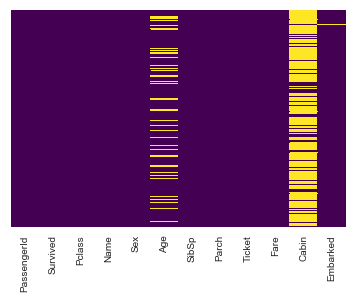

In [66]:
# Lets plot the missing value. Yellow colored lines represent the null values 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

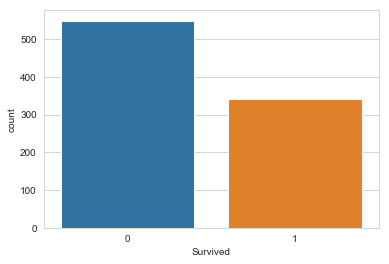

In [67]:
# Lets do some more analysis by plotting data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

#### In the trainig data set, we can see the number of survivors and non-survivors

## Lets plot male and female survivors and non-survivors

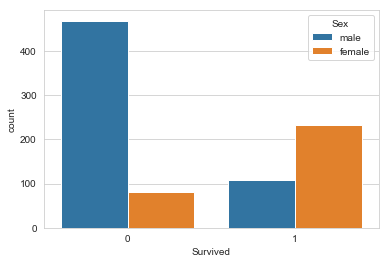

In [68]:
sns.countplot(x='Survived',data=train,hue='Sex')

#### People who didn't survive were more likely to be male than female. Also people who did survive were almost twice likely to be female than male

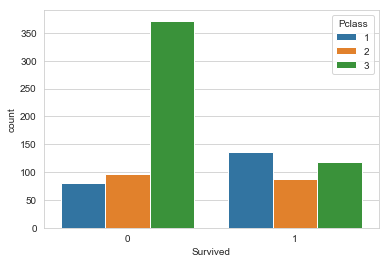

In [69]:
 sns.countplot(x='Survived',data=train,hue='Pclass')

#### People who didn't survive belonged to 3rd Class and people who survived were more likely to belong to upper classes say 1st and 2nd Class

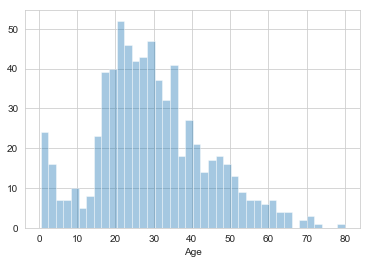

In [70]:
# lets see the distribution of age of the passengers.
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

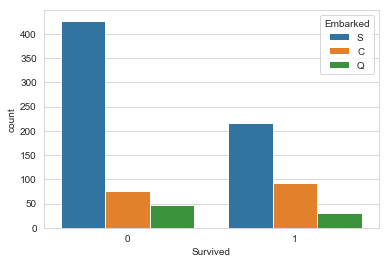

In [71]:
sns.countplot(x='Survived',data=train,hue='Embarked')

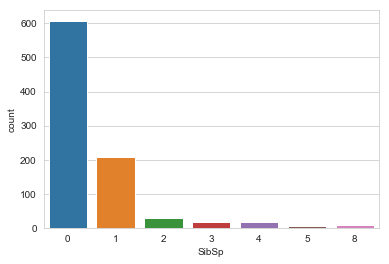

In [72]:
sns.countplot(x='SibSp',data=train)

#### The above plot tells that most of the passengers did not have children or spouse

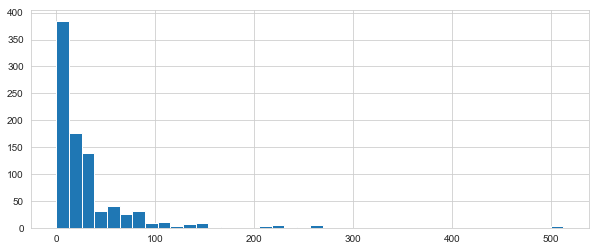

In [73]:
train['Fare'].hist(bins=40,figsize=(10,4))

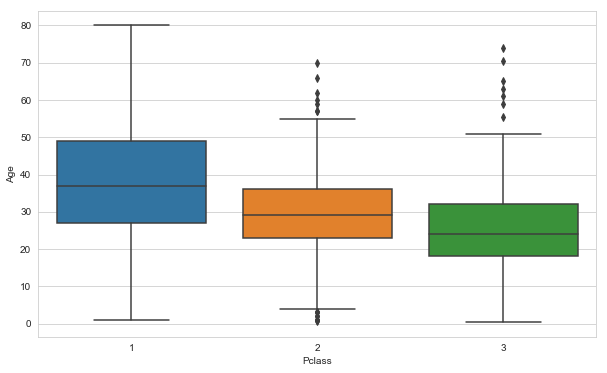

In [74]:
#lets figure out how to fill the missing value in the 'Age' column
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

##### The above plot suggests that passengers from 3rd Class were younger than those of 1st and 2nd Class

### Let us now fill the missing values in the 'Age' column. One way to do it is to fill in the average age but a better way to do it will be to take the average age per passenger class.

In [75]:
avg_age_per_class = train.groupby('Pclass').mean()['Age']
avg_age_per_class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

### We can fill the missing age values according to the average ages calculated per passenger class as above

In [76]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return avg_age_per_class[1]
        elif Pclass == 2:
            return avg_age_per_class[2]
        else:
            return avg_age_per_class[3]
    else:
        return Age

In [77]:
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

### Lets check the heatmap again to see if all the missing values in 'Age' column are filled now

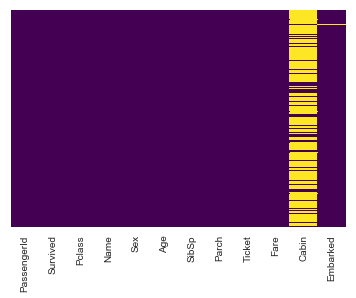

In [78]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Heatmap shows 'Age' column is now filled completely. 'Cabin' column has so many missing values that dropping it altogether will be a good idea

In [79]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


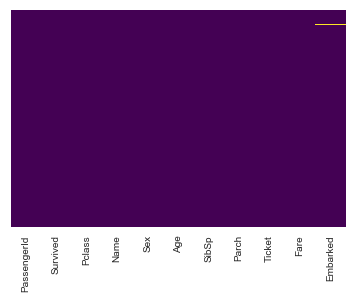

In [80]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 ####  'Embarked' column has couple of missing values. Lets drop only those missing values

In [81]:
train.dropna(inplace=True)

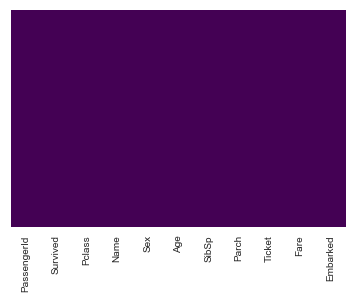

In [82]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### For a machine learning algorithm to understand, we must convert Sex' and 'Embarked' column into dummy variables with values 0 and 1

In [83]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [84]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Lets concat the 'sex' and 'embark' column into 'train' data frame

In [85]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Lets drop redundant and not so usefull columns

In [86]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [87]:
#PassengerId is also not useful as it is similar to index. Lets drop it.
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Let us now fit our model

In [88]:
X = train.drop('Survived',axis=1)
y= train['Survived']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [91]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression()

In [93]:
logmodel.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
predicitons = logmodel.predict(X_test)

In [99]:
predictions

NameError: name 'predictions' is not defined

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predicitons))


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predicitons)

#### The above metrics show that 73% times our classification algorithm is able to predict the survivors correctly and 84% of the times the non-survivors